
## BankMarketing 

## 1.Business Problem

Stakeholder:
A Portuguese bank that wants to increase its term deposit subscriptions among its clients.

Problem:
The bank runs direct marketing campaigns via phone calls to potential and existing clients. Not all clients are interested, and calling uninterested clients is costly and time-consuming.

Objective:
Build a classification model to predict whether a client will subscribe to a term deposit (yes or no) based on client characteristics and previous campaign outcomes.

## Business Question:

“Which clients are most likely to subscribe to a term deposit so the bank can focus marketing efforts efficiently and reduce wasted resources?”

Why Machine Learning:

The dataset is large (over 40,000 records) and contains multiple client, social, and campaign features.

Manual analysis would be slow and error-prone.

A classification model can automatically predict the likelihood of subscription for each client, guiding campaign strategies.

## 2. Dataset Overview 

Dataset Source

The dataset comes from the UCI Machine Learning Repository – Bank Marketing Dataset, which contains information about a Portuguese bank’s direct marketing campaigns conducted via phone calls.

Size and Scope

Records: ~45,000 clients

Features: 17 client and campaign attributes

Target: y – whether the client subscribed to a term deposit (yes/no)

Feature Categories

Client Information: age, job, marital, education

Financial Information: balance, default (credit in default), housing (housing loan), loan (personal loan)

Campaign Information: contact (type of communication), day, month, duration, campaign, pdays, previous, poutcome


## Problem Types

Binary Classification – Predict if a client will subscribe (yes) or not (no).

This dataset provides a rich combination of demographic, financial, and campaign features, making it ideal for building predictive classification models.

## 3. Data Understanding

a)Previewing the dataset

In [1]:
import pandas as pd

# Loading dataset

df = pd.read_csv('bank-additional-full.csv',sep = ';')

# checking the first 5 rows

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## b) Data summary

In [3]:
#check data information.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Checking for the missing values

In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Checking for the missing values

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## d) Target Variable check

In [6]:
## Checking the distributions

#Shows the proportion of clients who subscribed (yes) vs. did not (no).

df['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

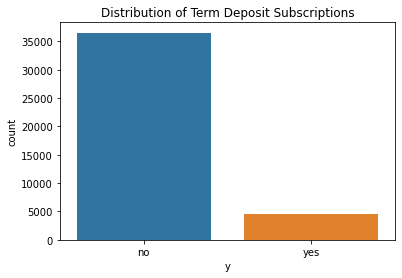

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the target variable
sns.countplot(x='y', data=df)
plt.title('Distribution of Term Deposit Subscriptions')
plt.show()


## 4. Data Preparation

a) Separate Target and Features

In [8]:
# Features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y']

# Convert target to binary numeric: 'yes' -> 1, 'no' -> 0
y = y.map({'yes': 1, 'no': 0})


## ML models prefer numeric targets.

##Dropping the target from features prevents data leaka


## b) Checking numeric and Categorical Features

In [9]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

print("Numeric features:", numeric_features.tolist())
print("Categorical features:", categorical_features.tolist())


Numeric features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


## C) Train -Test Split

In [10]:
from sklearn.model_selection import train_test_split

# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)